Trends
1. Upwards
2. Downwards
3. Horizontal

In [ ]:
import pandas as pd
import matplotlib.pyplot as pt
df = pd.read_csv('/content/day_wise.csv')
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df.isna().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [ ]:
df.describe(include='all')

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
unique,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,NaN,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,NaN,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,NaN,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,NaN,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000


In [ ]:
df['New cases'].fillna(df['New cases'].median(), inplace = True)
df.isna().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: Date, Length: 188, dtype: datetime64[ns]

In [ ]:
date = df.set_index('Date', inplace=True)
date

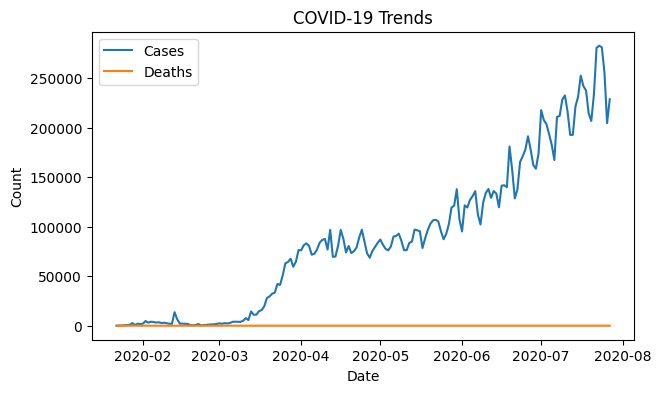

In [ ]:
pt.figure(figsize=(7, 4))
pt.plot(df.index, df['New cases'], label='Cases')
pt.plot(df.index, df['Deaths / 100 Cases'], label='Deaths')
pt.xlabel('Date')
pt.ylabel('Count')
pt.title('COVID-19 Trends')
pt.legend()
pt.show()

In [ ]:
df['New cases'] = df['New cases'].diff()

In [ ]:
# Upwards
upward_date = df[df['New cases'] > 0].index
upward_date

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-30', '2020-02-01',
               '2020-02-02', '2020-02-04',
               ...
               '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=114, freq=None)

In [ ]:
len(upward_date)

114

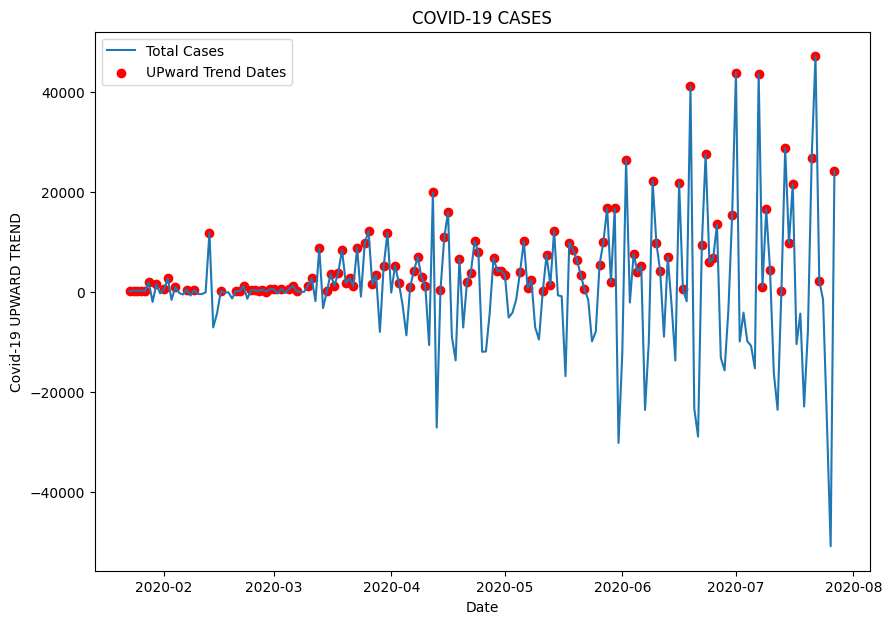

In [ ]:
# UPward trends
pt.figure(figsize=(10,7))
pt.plot(df.index, df['New cases'], label='Total Cases')
pt.scatter(upward_date, df.loc[upward_date, 'New cases'], color = 'red', label = 'UPward Trend Dates')
pt.title('COVID-19 CASES')
pt.xlabel('Date')
pt.ylabel('Covid-19 UPWARD TREND')
pt.legend()
pt.show()

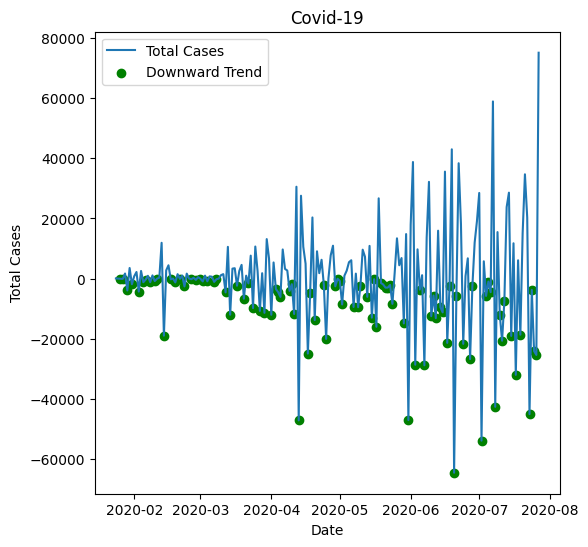

In [ ]:
# Downward Trend
df['New cases'] = df['New cases'].diff()
downward = df[df['New cases'] < 0].index
pt.figure(figsize=(6,6))
pt.plot(df.index, df['New cases'], label = 'Total Cases')
pt.scatter(downward, df.loc[downward, 'New cases'], color = 'green', label = 'Downward Trend')
pt.xlabel('Date')
pt.ylabel('Total Cases')
pt.title('Covid-19')
pt.legend()
pt.show()

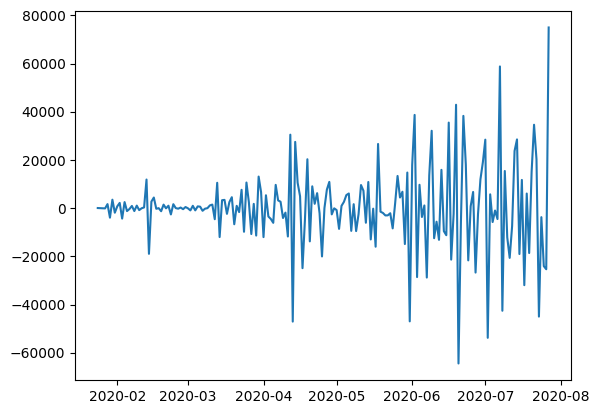

In [ ]:
horizontal = df[df['New cases'] == 0].index
pt.plot(df.index, df['New cases'], label='Total Cases')
pt.scatter(horizontal, df.loc[horizontal, 'New cases'], color='orange', label='Horizontal Trend')

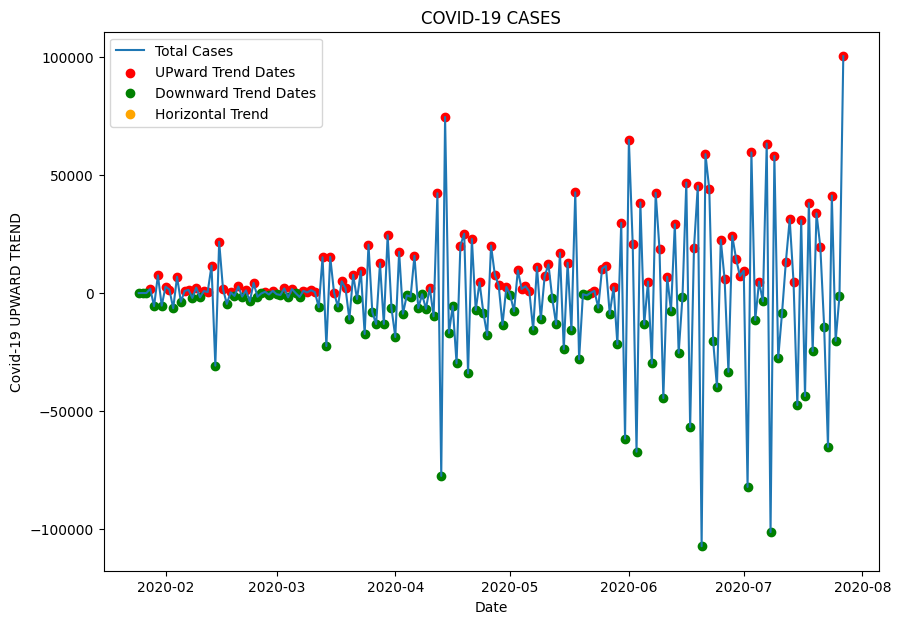

In [ ]:
df['New cases'] = df['New cases'].diff()

upward = df[df['New cases'] > 0].index
downward = df[df['New cases'] < 0].index
horizontal = df[df['New cases'] == 0].index

pt.figure(figsize=(10,7))
pt.plot(df.index, df['New cases'], label='Total Cases')
pt.scatter(upward, df.loc[upward, 'New cases'], color = 'red', label = 'UPward Trend Dates')
pt.scatter(downward, df.loc[downward, 'New cases'], color = 'green', label = 'Downward Trend Dates')
pt.scatter(horizontal, df.loc[horizontal, 'New cases'], color='orange', label='Horizontal Trend')
pt.title('COVID-19 CASES')
pt.xlabel('Date')
pt.ylabel('Covid-19 UPWARD TREND')
pt.legend()
pt.show()

Seasonality
1. Additive
2. Multiplicative
3. Trend-Seasonality interaction
4. Calender
5. Multiple

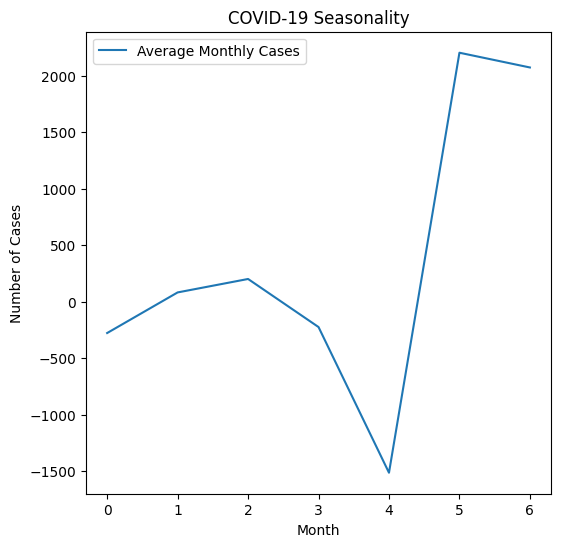

In [ ]:
# 1. Additive
# Extract the year, month, and day from the date
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
# Calculate the average number of cases for each month
average_cases = df.groupby(['year', 'month'])['New cases'].mean().reset_index()
# Plot the seasonality in monthly cases
pt.figure(figsize=(6, 6))
pt.plot(average_cases.index, average_cases['New cases'], label='Average Monthly Cases')
pt.xlabel('Month')
pt.ylabel('Number of Cases')
pt.title('COVID-19 Seasonality')
pt.legend()
pt.show()

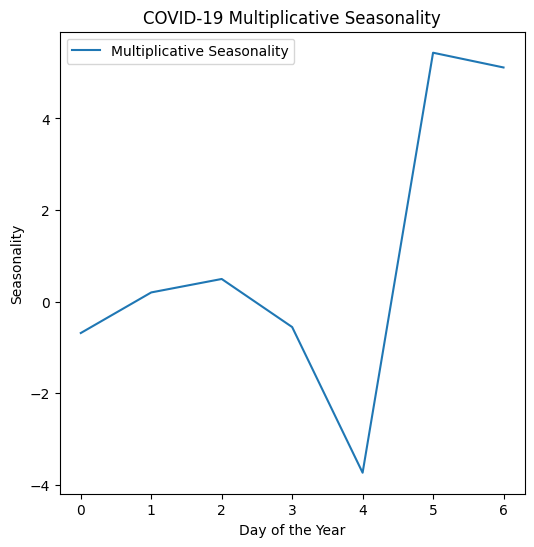

In [ ]:
# 2.Multiplicative

overall_average = df['New cases'].mean()

# Calculate the multiplicative seasonality by dividing the average daily cases by the overall average
average_cases['seasonality'] = average_cases['New cases'] / overall_average

# Plot the multiplicative seasonality
pt.figure(figsize=(6, 6))
pt.plot(average_cases.index, average_cases['seasonality'], label='Multiplicative Seasonality')
pt.xlabel('Day of the Year')
pt.ylabel('Seasonality')
pt.title('COVID-19 Multiplicative Seasonality')
pt.legend()
pt.show()

IRREGULARITY
 1. Random Nois
 2. Outliers


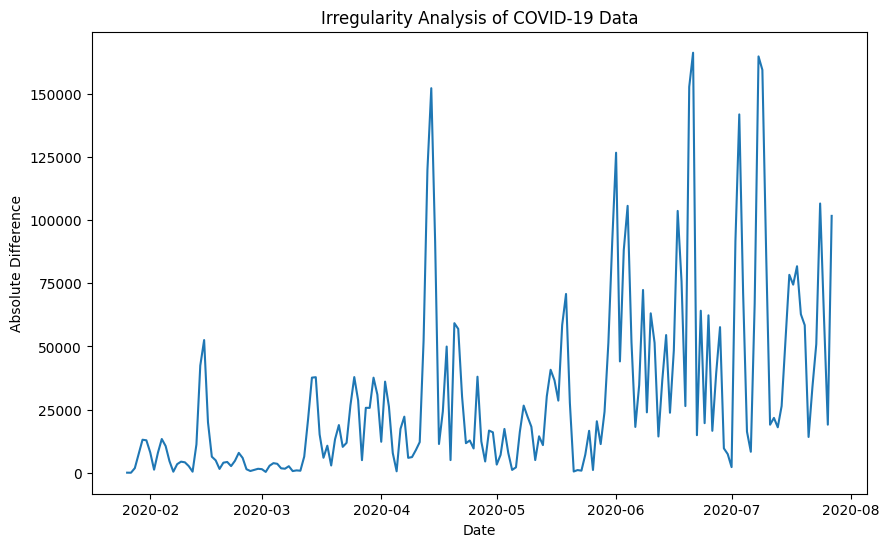

In [ ]:
import numpy as np
 # Compute the absolute differences of the first differences
diff_df = df.diff()
abs_diff_df = np.abs(diff_df)

# Plot the absolute differences to analyze irregularity
pt.figure(figsize=(10, 6))
pt.plot(abs_diff_df.index, abs_diff_df['New cases'])
pt.xlabel('Date')
pt.ylabel('Absolute Difference')
pt.title('Irregularity Analysis of COVID-19 Data')
pt.show()

CYCLIC
1. Business Cycles
2. Market Cycles
3. Economic Cycles
4. Long-Term Climate Pattern

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.fillna(method='ffill')  # Forward fill missing values

# Perform seasonal decomposition
decomposition = seasonal_decompose(df, model='multiplicative')

# Extract the cyclic component
cyclic_component = decomposition.resid

# Plot the cyclic component to analyze cyclic patterns
pt.figure(figsize=(10, 6))
pt.plot(cyclic_component.index, cyclic_component)
pt.xlabel('Date')
pt.ylabel('Cyclic Component')
pt.title('Cyclic Analysis of COVID-19 Data')
pt.show()